In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
train_path = 'chest_xray/train'
val_path = 'chest_xray/val'
test_path = 'chest_xray/test'

img_width, img_height = 64, 64
batch_size = 32


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\91957\Medical-Image-Diagnosis-using-Convolutional-Neural-Networks\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 62, 62, 32)    │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 31, 31, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 29, 29, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 14, 14, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 12544)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │    1,605,760 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │          129 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


C:\Users\91957\Medical-Image-Diagnosis-using-Convolutional-Neural-Networks\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.8122 - loss: 0.4137 - val_accuracy: 0.8750 - val_loss: 0.2928
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.9519 - loss: 0.1271 - val_accuracy: 0.9375 - val_loss: 0.1868
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 249ms/step - accuracy: 0.9520 - loss: 0.1229 - val_accuracy: 0.9375 - val_loss: 0.2040
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 320ms/step - accuracy: 0.9585 - loss: 0.1122 - val_accuracy: 0.8125 - val_loss: 0.2853
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 259ms/step - accuracy: 0.9622 - loss: 0.0955 - val_accuracy: 0.9375 - val_loss: 0.1017
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.9687 - loss: 0.0828 - val_accuracy: 0.9375 - val_loss: 0.1065
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - accuracy: 0.9720 - loss: 0.0747 - val_accuracy: 0.9375 - val_loss: 0.1132
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 279ms/step - accuracy: 0.9765 - loss: 0

In [6]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5119 - loss: 2.4405
Test Accuracy: 74.84%


In [7]:
model.save("pneumonia-detection-model.h5")
print("Model saved as pneumonia-detection-model.h5")


Model saved as pneumonia-detection-model.h5


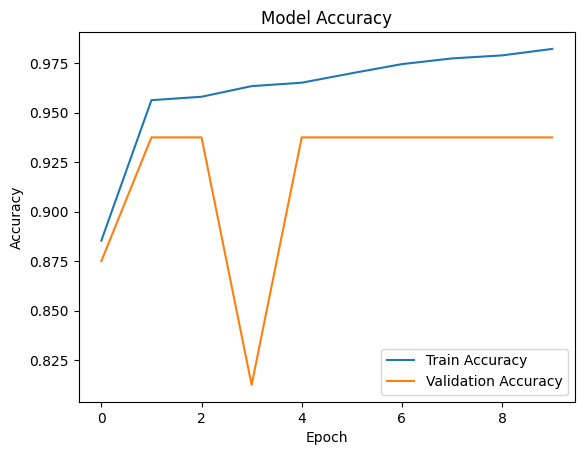

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
